## Muhammad Musa
## CS 760
## HW - 2

In [1]:

import numpy
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange as lg
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score


y_labels = [0,1]

## Making a Decision Tree

## Guildines given:
1. y \in {0,1}
2. X is always continous, and numerical, which allows the split condiiton (c>=j), to be met
3. There can be a maximum of two splits due to the condition in point 2. i.e: The maximum number of child nodes a node can have is 2
4. The left branch is >=, and the right branch is <, just like a BST


In [173]:
def entropy(p,n):
    total = p+n
    if total == 0:
        return 0
    p = p/total
    n = n/total
    if n != 0 :
        n = n*math.log2(n)
    if p!= 0:
        p = p*math.log2(p)
    entropy = -p -n
    return entropy

In [198]:
def decision( table, tree , csplits):
    # if the node is empty, make it a leaf node 
    # print(table)   
    # print(table)
    if table.shape[0] == 0:
        # if there is no majoriity class, predict 1
        return 1, csplits
    
    # same thing as entopy of any candidiates split is zero
    # entopry of candidiate zero only if all are same
    init_label = table.iloc[:,-1].value_counts()
    if len(init_label) == 1:
        # determining class label for leaf
        return init_label.index[0], csplits
            
            

    ig = {} # final candidiate splits from all features,  |ig| = 2 always in our case
    for i in table.columns.tolist()[:-1]:
        total = table[i].shape[0]
        vals = table[i].unique()
        ig_local = {}
        
        for split in vals:

            true_more = table[(table[i]>=split)&(table.iloc[:, -1] == y_labels[1])].shape[0]
            false_more = table[(table[i]>=split)&(table.iloc[:, -1] == y_labels[0])].shape[0]
            true_less = table[(table[i]<split)&(table.iloc[:, -1] == y_labels[1])].shape[0]
            false_less = table[(table[i]<split)&(table.iloc[:, -1] == y_labels[0])].shape[0]

            total_true = true_less + true_more
            total_false = false_less + false_more
            total_more = true_more + false_more
            total_less = false_less + true_less
            
            info_gain = entropy(total_true, total_false) - ((total_less/total)*entropy(true_less, false_less)) - ((total_more/total)*entropy(true_more, false_more))
            split_t = table[table[i]>=split].shape[0]
            if info_gain>0:
                gain_ratio = info_gain / entropy(split_t, total-split_t)
            else:
                gain_ratio = info_gain
            ig_local[split] = gain_ratio
        
        csplits.append(ig_local)

        use = max(ig_local, key=lambda k: ig_local[k])
        ig[i] =  (use,ig_local[use]) 
    
    csplits.append("next")
        
    make_leaf = all([x[1] == 0 for x in ig.values()])
    if make_leaf:
        # this means that all splits have zero gain ratio
        modes = len(table.iloc[:, -1].mode())
        # if there is no max, return 1
        if modes > 1:
            return 1
        # otheriwse find the max in the table
        else:
            return table.iloc[:, -1].mode()[0] 
    
    choose = max(ig, key=lambda k: ig[k][1])
    true_table = table[table[choose] >= ig[choose][0]]
    false_table = table[table[choose] < ig[choose][0]]
    tree[choose] = [{"Spilt on": ig[choose][0]}]
    tree[choose].append({"Left Branch":decision(true_table, {}, csplits)[0]})
    tree[choose].append({"Right Branch": decision(false_table, {}, csplits)[0]})
    return tree ,csplits

## Classifying using Decision Tree

In [175]:
def base_case(row, dic):
    col = list(dic.keys())[0]
    val = dic[col]
    if col == 'y':
        idx = 1
    else:
        idx = 0
    if (row[idx]) >= list(val[0].values())[0]:
        ans = list(val[1].values())[0]
    else:
        ans = list(val[2].values())[0]
    if type(ans) == dict:
        return base_case(row, ans)
    else:
        return ans

In [176]:
def test(test_df, classifier):
    test_df = pd.DataFrame(test_df)
    dic = classifier
    cond = True
    preds = []
    
    for _, row in test_df.iterrows():
        preds.append(base_case(row, dic))
    return preds

## Question 2
### Part 3

In [199]:
filename = "Druns.txt"
df = pd.read_csv(filename, sep=" ", header = None, names=["x", "y", "Label"])  

In [200]:
Druns , csplits= decision(df, {}, [])
print("Candidate splits and Gain Ratios for Root Node\nNOTE: If gain ratio = 0, information gain is printed.\nFeature 1:")
for k,v in csplits[0].items():
    print(f'Gain Ration if value >= {k} : {v}')
print("For Feature 2:")
for k,v in csplits[1].items():
    print(f'Gain Ration if value >= {k} : {v}')
    
print("\n\nFinal Tree:")
Druns

Candidate splits and Gain Ratios for Root Node
NOTE: If gain ratio = 0, information gain is printed.
Feature 1:
Gain Ration if value >= 0.1 : 0.10051807676021852
Gain Ration if value >= 0.0 : 0.0
For Feature 2:
Gain Ration if value >= -2 : 0.0
Gain Ration if value >= -1 : 0.10051807676021852
Gain Ration if value >= 0 : 0.055953759631263686
Gain Ration if value >= 1 : 0.005780042205152451
Gain Ration if value >= 2 : 0.0011443495172768668
Gain Ration if value >= 3 : 0.016411136842102245
Gain Ration if value >= 4 : 0.0497490641817786
Gain Ration if value >= 5 : 0.11124029586339805
Gain Ration if value >= 6 : 0.2360996061436081
Gain Ration if value >= 7 : 0.05595375963126377
Gain Ration if value >= 8 : 0.43015691613098095


Final Tree:


{'y': [{'Spilt on': 8},
  {'Left Branch': 1},
  {'Right Branch': {'y': [{'Spilt on': 0},
     {'Left Branch': {'y': [{'Spilt on': 6},
        {'Left Branch': {'y': [{'Spilt on': 7},
           {'Left Branch': 0},
           {'Right Branch': 1}]}},
        {'Right Branch': 0}]}},
     {'Right Branch': {'x': [{'Spilt on': 0.1},
        {'Left Branch': 0},
        {'Right Branch': 1}]}}]}}]}

### Part 4

In [201]:
filename_d3 = "D3leaves.txt"
df_d3= pd.read_csv(filename_d3, sep=" ", header = None, names=["x", "y", "Label"])  

In [202]:
D3 , _= decision(df_d3, {}, [])    
print("\nFinal Tree:")
D3


Final Tree:


{'x': [{'Spilt on': 10},
  {'Left Branch': 1},
  {'Right Branch': {'y': [{'Spilt on': 3},
     {'Left Branch': 1},
     {'Right Branch': 0}]}}]}

### Part 5
Building a tree using D1.txt

In [204]:
filename_d1 = "D1.txt"
df_d1= pd.read_csv(filename_d1, sep=" ", header = None, names=["x", "y", "Label"])  
D1 , _= decision(df_d1, {}, [])    
print("\nFinal Tree:")
D1


Final Tree:


{'y': [{'Spilt on': 0.201829}, {'Left Branch': 1}, {'Right Branch': 0}]}

Building a tree using D2.txt

In [206]:
filename_d2 = "D2.txt"
df_d2= pd.read_csv(filename_d2, sep=" ", header = None, names=["x", "y", "Label"])  
D2 , _= decision(df_d2, {}, [])    
print("\nFinal Tree:")
D2


Final Tree:


{'x': [{'Spilt on': 0.533076},
  {'Left Branch': {'y': [{'Spilt on': 0.228007},
     {'Left Branch': {'y': [{'Spilt on': 0.424906},
        {'Left Branch': 1},
        {'Right Branch': {'x': [{'Spilt on': 0.708127},
           {'Left Branch': 1},
           {'Right Branch': {'y': [{'Spilt on': 0.32625},
              {'Left Branch': {'x': [{'Spilt on': 0.595471},
                 {'Left Branch': {'x': [{'Spilt on': 0.646007},
                    {'Left Branch': 1},
                    {'Right Branch': {'y': [{'Spilt on': 0.403494},
                       {'Left Branch': 1},
                       {'Right Branch': 0}]}}]}},
                 {'Right Branch': 0}]}},
              {'Right Branch': 0}]}}]}}]}},
     {'Right Branch': {'x': [{'Spilt on': 0.887224},
        {'Left Branch': {'y': [{'Spilt on': 0.037708},
           {'Left Branch': {'y': [{'Spilt on': 0.082895},
              {'Left Branch': 1},
              {'Right Branch': {'x': [{'Spilt on': 0.960783},
                 {'Lef

### Part 6
For D1.txt

In [326]:
y_max = df_d1.iloc[:, 1].max() + 0.1
y_min = df_d1.iloc[:, 1].min() - 0.1
x_max = df_d1.iloc[:, 0].max() + 0.1
x_min = df_d1.iloc[:, 0].min() - 0.1

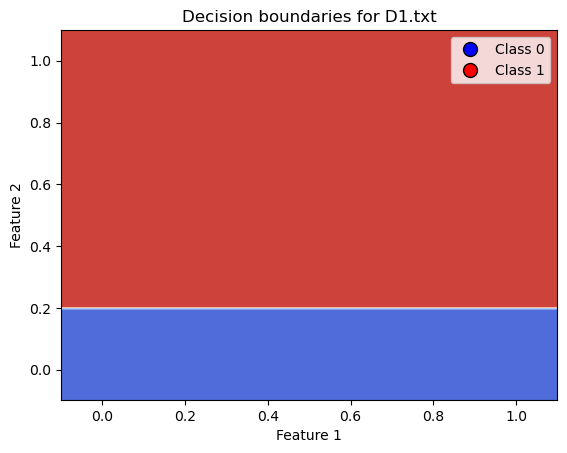

In [339]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
coords = np.c_[xx.ravel(), yy.ravel()]
store = test(coords, D1)
store = np.array(store)
store = store.reshape(xx.shape)
plt.contourf(xx, yy, store,cmap = plt.cm.coolwarm, alpha = 1)
legend_handles = [plt.Line2D([0], [0], color = (0,0,0,0), marker='o', markerfacecolor='blue', markersize=10, label='Class 0'),
                  plt.Line2D([0], [0], marker='o', color=(0,0,0,0), markerfacecolor='red', markersize=10, label='Class 1')]

plt.title("Decision boundaries for D1.txt")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.legend(handles=legend_handles, loc='upper right')


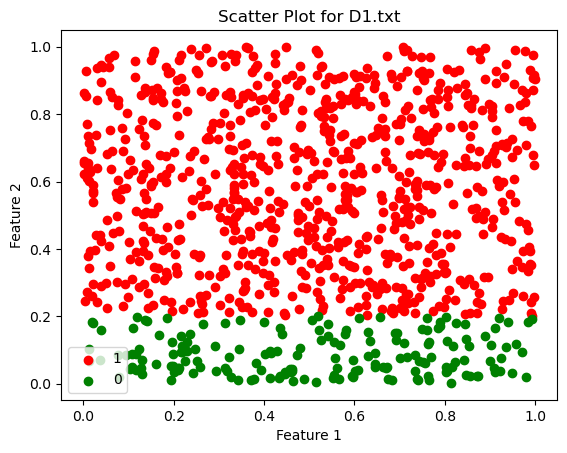

In [340]:
colors = {1: 'r', 0: 'g'}

for class_label, color in colors.items():
    subset = df_d1[df_d1.iloc[:,2] == class_label]
    plt.scatter(subset.iloc[:,0], subset.iloc[:,1],  c=color, label = class_label)
plt.title("Scatter Plot for D1.txt")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

For D2.txt

In [230]:
y_max = df_d2.iloc[:, 1].max() + 0.1
y_min = df_d2.iloc[:, 1].min() - 0.1
x_max = df_d2.iloc[:, 0].max() + 0.1
x_min = df_d2.iloc[:, 0].min() - 0.1

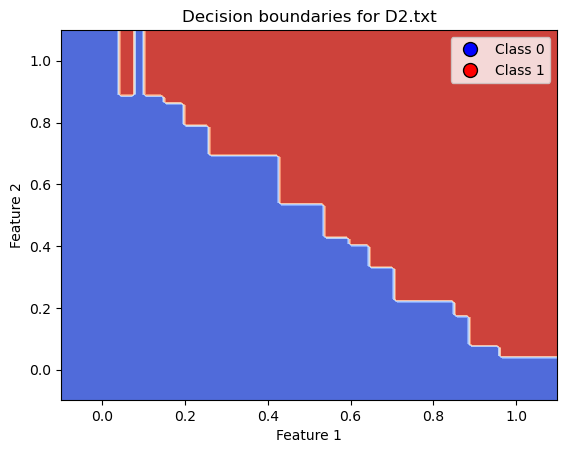

In [342]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
coords = np.c_[xx.ravel(), yy.ravel()]
store = test(coords, D2)
store = np.array(store)
store = store.reshape(xx.shape)
plt.contourf(xx, yy, store,cmap = plt.cm.coolwarm, alpha = 1)
legend_handles = [plt.Line2D([0], [0], color = (0,0,0,0), marker='o', markerfacecolor='blue', markersize=10, label='Class 0'),
                  plt.Line2D([0], [0], marker='o', color=(0,0,0,0), markerfacecolor='red', markersize=10, label='Class 1')]

plt.title("Decision boundaries for D2.txt")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(handles=legend_handles, loc='upper right')

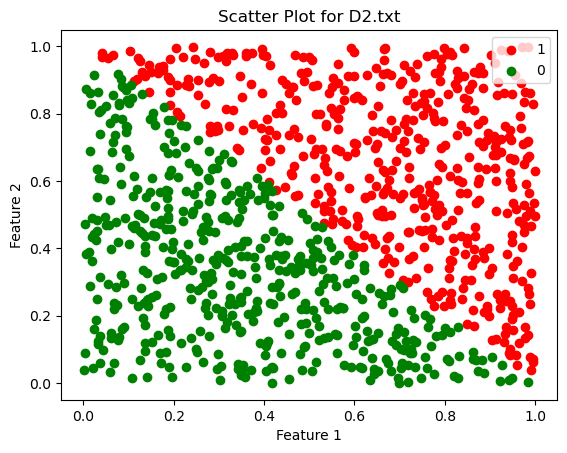

In [344]:
colors = {1: 'r', 0: 'g'}

for class_label, color in colors.items():
    subset = df_d2[df_d2.iloc[:,2] == class_label]
    plt.scatter(subset.iloc[:,0], subset.iloc[:,1],  c=color, label = class_label)

plt.title("Scatter Plot for D2.txt")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

### Part 7

In [273]:
filename_dbig = "Dbig.txt"
df_dbig= pd.read_csv(filename_dbig, sep=" ", header = None, names=["x", "y", "Label"])
perm = df_dbig.sample(frac=1, random_state=40)
test_size = len(perm) - 8192
D_8192 = perm.head(8192)
test_set = perm.tail(test_size).drop("Label", axis=1)
test_labels = perm.tail(test_size)["Label"]

In [402]:
n = [32,128,512,2048,8192]
dataset = []
for i in n:
    dataset.append(D_8192.head(i))

In [270]:
models = []
for idx, i in enumerate(n):
    # print(dataset[idx].shape)
    models.append(decision(dataset[idx], {}, [])[0])


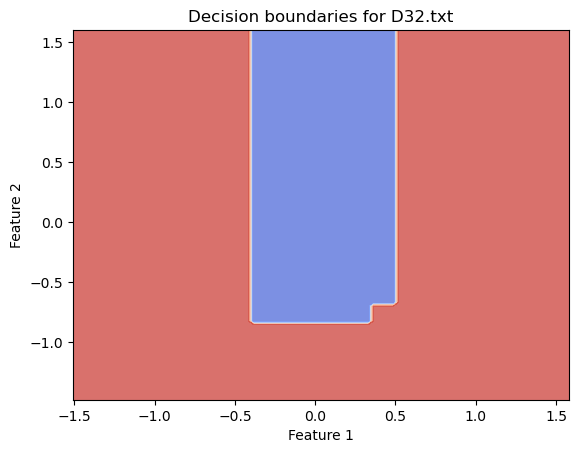

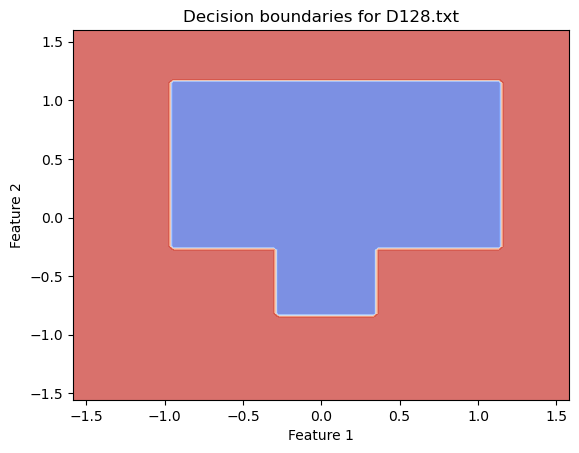

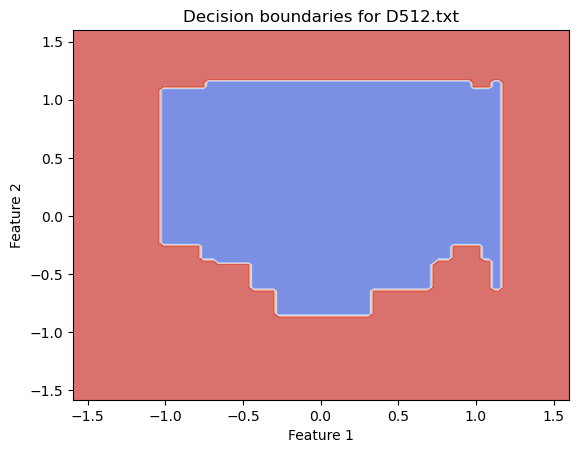

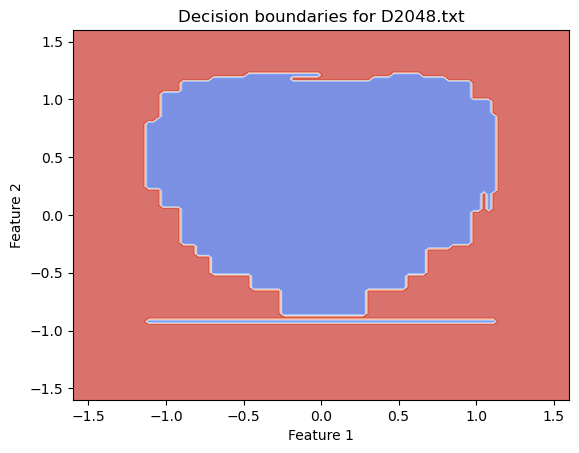

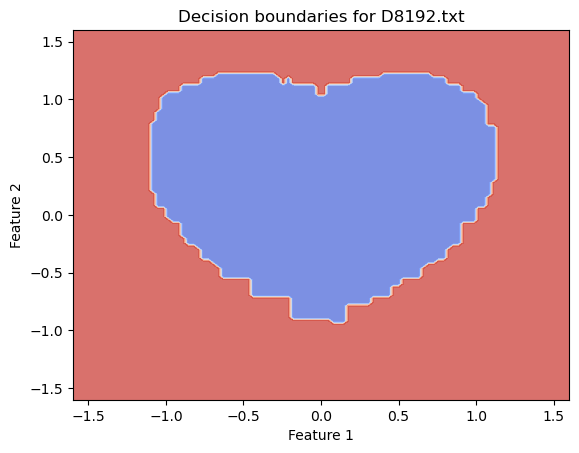

In [271]:
for idx, i in enumerate(n):
    plt.figure()
    y_max = dataset[idx].iloc[:, 1].max() + 0.1
    y_min = dataset[idx].iloc[:, 1].min() - 0.1
    x_max = dataset[idx].iloc[:, 0].max() + 0.1
    x_min = dataset[idx].iloc[:, 0].min() - 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    coords = np.c_[xx.ravel(), yy.ravel()]
    store = test(coords, models[idx])
    store = np.array(store)
    store = store.reshape(xx.shape)
    plt.contourf(xx, yy, store,cmap = plt.cm.coolwarm, alpha = 0.75)
    colors = {1: 'r', 0: 'g'}

    plt.title(f"Decision boundaries for D{i}.txt")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

Finding error and plotting n vs err_n. 

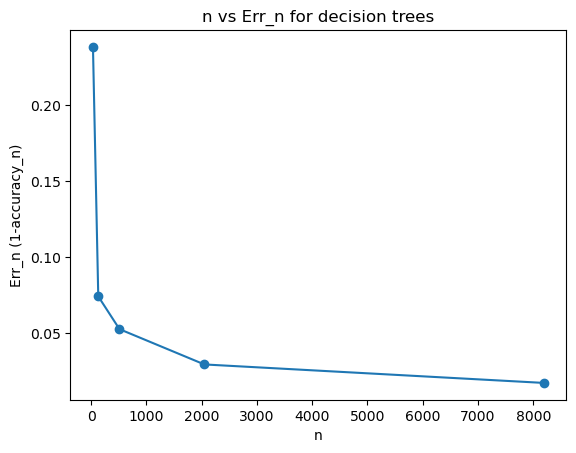

In [367]:
acc = []
for i in range(len(n)):
    ans = test(test_set, models[i])
# test_labels= test_labels.tolist()
    count = 0
    for idx in range(len(ans)):
        if test_labels[idx] == ans[idx]:
            count +=1
            
    acc.append(1- (count/len(ans)))

plt.plot(n,acc, '-o')
plt.title("n vs Err_n for decision trees")
plt.xlabel("n")
plt.ylabel("Err_n (1-accuracy_n)")
plt.show()
# plt.n



Calculate the number of nodes for each mdoel

In [372]:
n_nodes = []
def cnodes(split, all_nodes):
    c,c2 = 0,0
    main = list(split.values())[0]
    left = list(main[1].values())[0]
    right = list(main[2].values())[0]
    if type(left) == dict:
        c =  cnodes(left,0)
    if type(right) == dict:
        c2 =  cnodes(right,0)
    return c+c2+1

for i in range(len(n)):
    n_nodes.append(cnodes(models[i],0))
    
n_nodes

[5, 9, 30, 63, 134]

## Question 3
### sklearn


In [403]:
num_nodes = []
errors = []
for idx,i in enumerate(n):
    x = dataset[idx].iloc[:,0:2]
    y = dataset[idx].iloc[:, -1]
    clf = dtc()
    clf.fit(x,y)
    num_nodes.append(clf.tree_.node_count)
    y_pred = clf.predict(test_set)
    errors.append(1-(accuracy_score(test_labels, y_pred)))
errors, num_nodes


([0.24391592920353977,
  0.08185840707964598,
  0.05530973451327437,
  0.036504424778761035,
  0.01880530973451322],
 [11, 23, 59, 127, 251])

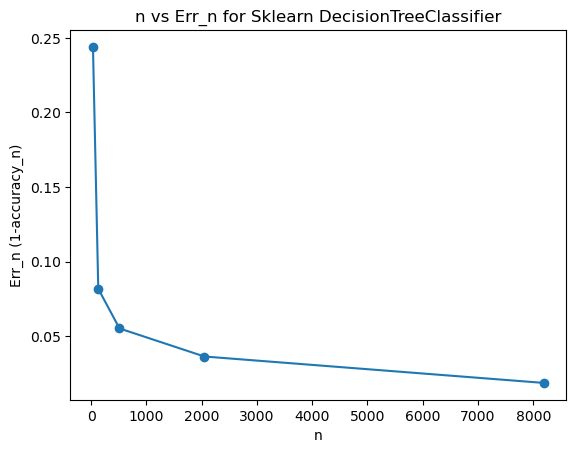

In [405]:
plt.plot(n, errors, '-o')
plt.title("n vs Err_n for Sklearn DecisionTreeClassifier")
plt.xlabel("n")
plt.ylabel("Err_n (1-accuracy_n)")
plt.show()

## Question 4
### Lagrange Model

In [374]:
n = 100
x = np.random.uniform(high = 10, size = 100)
y = np.sin(x)
x_test = np.random.uniform(high = 10, size = 100)
x_test = np.sort(x_test)
y_test = np.sin(x_test)
f = lg(x,y)

In [376]:
y_pred_test = f(x_test)
y_pred_train = f(x)

test_err = np.log(mean_squared_error(y_test, y_pred_test))
train_err = np.log(mean_squared_error(y, y_pred_train))

print("Train error on model:", train_err)
print("Test error on model:", test_err)

Train error on model: 327.6360931590477
Test error on model: 328.493150507472


Text(0, 0.5, 'Log Mean Squared Error')

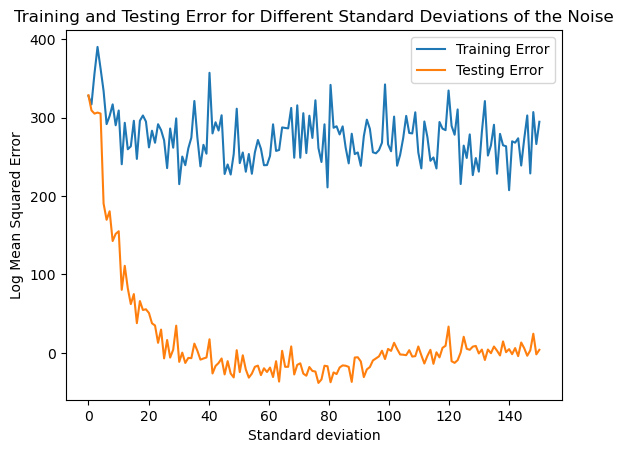

In [394]:
dev_range = np.linspace(0,150,150)
train = []
test = []

for stdev in dev_range:
    noise = np.random.normal(0, stdev, x.shape)
    new_data = x + noise
    y = np.sin(new_data)
    f = lg(new_data,y)
    y_pred_test = f(x_test)
    y_pred_train = f(new_data)
    test.append(np.log(mean_squared_error(y_test, y_pred_test)))
    train.append(np.log(mean_squared_error(y, y_pred_train)))
    
plt.plot(dev_range,train, label = "Training Error")
plt.plot(dev_range,test, label = "Testing Error")
plt.legend()
plt.title("Training and Testing Error for Different Standard Deviations of the Noise")
plt.xlabel("Standard deviation")
plt.ylabel("Log Mean Squared Error")


